# Project: Investigate Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I wil be analyzing TMDB data provided by Udacity. My analysis will address the following questions:

Q1. What are some defining charateristics of popular movies?<br/ >
Q2. Which genres tend to be most popular and generate the most revenue?<br/ >
Q3. Has average runtime increased over the years? <br/ >
Q4. Describe movie release trends<br/ >

In [102]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [103]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb = pd.read_csv('tmdb-movies.csv')

#inspect data
tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [104]:
#Explore data
tmdb.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Check datatypes and info

In [105]:
#Check null data
tmdb.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Check statistics 

In [106]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


In [107]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

#### Split genres by | delimiter and gives each its own row. Will use this dataframe for analyzing genre data
Syntax from https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows

In [108]:
s = tmdb['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1) # to line up with df's index
s.name = 'genres2' # needs a name to join
s #verify

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
1              Adventure
1        Science Fiction
1               Thriller
2              Adventure
2        Science Fiction
2               Thriller
3                 Action
3              Adventure
3        Science Fiction
3                Fantasy
4                 Action
4                  Crime
4               Thriller
5                Western
5                  Drama
5              Adventure
5               Thriller
6        Science Fiction
6                 Action
6               Thriller
6              Adventure
7                  Drama
7              Adventure
7        Science Fiction
8                 Family
              ...       
10853              Drama
10853            Romance
10854           Thriller
10854              Drama
10854              Crime
10855             Comedy
10855             Family
10855            Mystery
10855            Romance


In [109]:
#deletes old genres column and joins with new column
del tmdb['genres'] 
tmdb_new = tmdb.join(s)

#### Drop duplicates

In [110]:
#Check for dupes
sum(tmdb_new.duplicated())


5

In [111]:
# # Drop rows with missing values and drop duplicate
#tmdb.dropna(inplace=True)
tmdb_new.drop_duplicates(inplace=True)

In [112]:
#Verify dupes removed
sum(tmdb_new.duplicated())

0

#### Drop columns 

In [113]:
#Drop columns I won't use in analysis
tmdb_new.drop(['homepage','tagline','overview','keywords', 'budget_adj','revenue_adj','director','imdb_id','production_companies','cast'], axis=1, inplace = True)


#### Convert datatypes 

In [114]:
#Convert Release Date to datetime data type

tmdb_new['release_date'] = pd.to_datetime(tmdb_new['release_date'])

#### Drop rows with null data

In [115]:

tmdb_new.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
release_date       0
vote_count         0
vote_average       0
release_year       0
genres2           23
dtype: int64

In [116]:
tmdb_new.dropna(inplace = True)

In [117]:
tmdb_new.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
genres2           0
dtype: int64

#### Check data structure again

In [118]:
#Check data again after manipulation
tmdb_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10865
Data columns (total 11 columns):
id                26955 non-null int64
popularity        26955 non-null float64
budget            26955 non-null int64
revenue           26955 non-null int64
original_title    26955 non-null object
runtime           26955 non-null int64
release_date      26955 non-null datetime64[ns]
vote_count        26955 non-null int64
vote_average      26955 non-null float64
release_year      26955 non-null int64
genres2           26955 non-null object
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 2.5+ MB


### Modify original dataframe

In [119]:
#Remove dupes
sum(tmdb.duplicated())
tmdb.drop_duplicates(inplace=True)
sum(tmdb.duplicated())

0

In [120]:
#Drop columns I won't use in analysis
tmdb.drop(['homepage','tagline','overview','keywords', 'budget_adj','revenue_adj','director','imdb_id','production_companies','cast'], axis=1, inplace = True)
#Convert release date
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

In [121]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 933.7+ KB


#### Create popularity bins based on quartiles

In [122]:
bin_names = ["Low","Average","High"]
tmdb['popularity_cat'] = pd.qcut(tmdb['popularity'],3,labels = bin_names)

#See count of different categories
tmdb['popularity_cat'].value_counts().to_frame()

,popularity_cat
High,3622
Low,3622
Average,3621


In [123]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000,10865.000,10865.000,10865.000,10865.000,10865.000,10865.000,10865.000
mean,66066.374,0.646,14624286.064,39826896.077,102.072,217.400,5.975,2001.322
std,92134.092,1.000,30914284.611,117008277.458,31.383,575.645,0.935,12.813
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000
25%,10596.000,0.208,0.000,0.000,90.000,17.000,5.400,1995.000
50%,20662.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000
75%,75612.000,0.714,15000000.000,24000000.000,111.000,146.000,6.600,2011.000
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000


In [124]:
#check popularity for possible outliers
tmdb.query('popularity >3')

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,popularity_cat
0,135397,32.986,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.500,2015,High
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.100,2015,High
2,262500,13.113,110000000,295238201,Insurgent,119,2015-03-18,2480,6.300,2015,High
3,140607,11.173,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.500,2015,High
4,168259,9.335,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.300,2015,High
5,281957,9.111,135000000,532950503,The Revenant,156,2015-12-25,3929,7.200,2015,High
6,87101,8.654,155000000,440603537,Terminator Genisys,125,2015-06-23,2598,5.800,2015,High
7,286217,7.667,108000000,595380321,The Martian,141,2015-09-30,4572,7.600,2015,High
8,211672,7.404,74000000,1156730962,Minions,91,2015-06-17,2893,6.500,2015,High
9,150540,6.327,175000000,853708609,Inside Out,94,2015-06-09,3935,8.000,2015,High


Unusually high popularity seem to be correlated with high vote counts

#### Check distribution of data

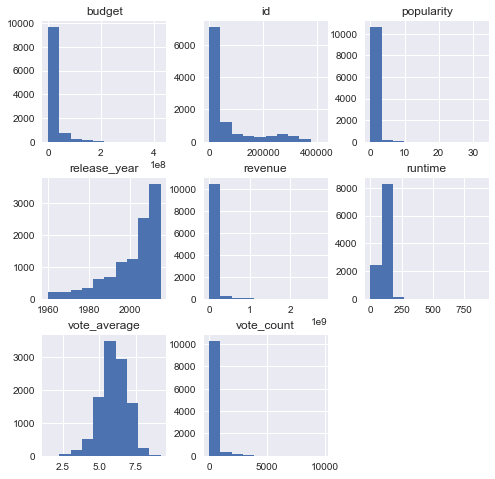

In [125]:
#see which column data is normalized, which ones are not
tmdb.hist(figsize=(8,8));

Budget, ID, popularity, revenue,  and vote count are right skewed. Vote_average has a normal distribution while release year is left skewed. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### Q1. What are some defining charateristics of popular movies?

In [126]:
tmdb.groupby(['popularity_cat'], as_index=False).mean()

,popularity_cat,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
0,Low,82228.098,0.147,2531505.621,2899183.848,97.783,28.229,5.879,2000.737
1,Average,61509.075,0.391,6950012.403,9879659.873,101.472,57.623,5.839,2000.650
2,High,54460.692,1.401,34389221.374,106693576.360,106.961,566.302,6.207,2002.579


Very popular movies tend to have higher vote counts, longer runtimes, and higher voting averages. They also have bigger budgets and generate the most revenue.

### Q2. Which genres tend to be most popular and generate the most revenue? 

#### Find the most popular genre

In [127]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
genre_pop = tmdb_new.groupby(['genres2'], as_index=False)['popularity'].mean()
genre_pop.sort_values('popularity', ascending=False).reset_index(drop=True)

,genres2,popularity
0,Adventure,1.154
1,Science Fiction,1.002
2,Fantasy,0.993
3,Action,0.926
4,Animation,0.852
5,Family,0.787
6,Crime,0.745
7,Thriller,0.742
8,War,0.728
9,Mystery,0.690


The most popular genre is Adventure with an average popular score of 1.15


#### Find the genre that generates highest revenue

In [128]:
genre_rev = tmdb_new.groupby(['genres2'], as_index=False)['revenue'].mean()
genre_rev.sort_values('revenue', ascending=False).reset_index(drop=True)


,genres2,revenue
0,Adventure,113137861.069
1,Fantasy,96313657.082
2,Animation,75256062.223
3,Action,72794732.003
4,Family,72433176.374
5,Science Fiction,70140558.034
6,War,47605183.300
7,Crime,42368661.645
8,Thriller,41728417.544
9,Mystery,40217566.662


#### Calculate using proportions


In [129]:
ttl = genre_rev['revenue'].sum()
genre_rev['proportion'] = (genre_rev['revenue']/ttl)*100
genre_rev

,genres2,revenue,proportion
0,Action,72794732.003,8.233
1,Adventure,113137861.069,12.795
2,Animation,75256062.223,8.511
3,Comedy,37526242.072,4.244
4,Crime,42368661.645,4.792
5,Documentary,2041106.994,0.231
6,Drama,29232255.726,3.306
7,Family,72433176.374,8.192
8,Fantasy,96313657.082,10.892
9,Foreign,1520459.835,0.172


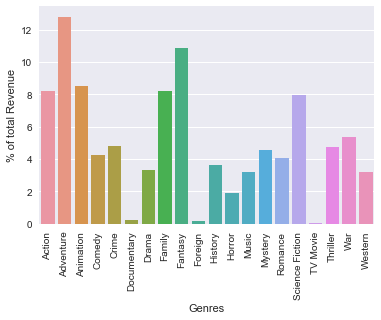

In [130]:
ax4 =sns.barplot(x="genres2",data=genre_rev,y="proportion")
ax4.set(xlabel='Genres', ylabel='% of total Revenue')
plt.xticks(rotation=90)
#ax4.invert_yaxis()
plt.show()

#### Count of different movie genres

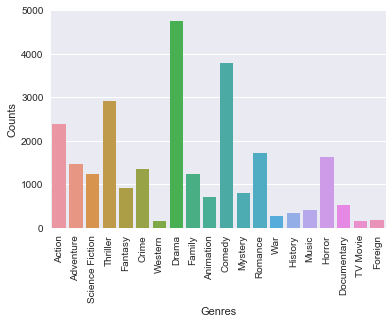

In [131]:
ax3 =sns.countplot(x="genres2",data=tmdb_new)
ax3.set(xlabel='Genres', ylabel='Counts')
plt.xticks(rotation=90)
plt.show()

Drama has the most frequent movie genre in this data set. Western has the least number of releases

### Q3. Has average runtime increased over the years?

In [132]:
runtime_df =tmdb.groupby(['release_year'], as_index=False)['runtime'].mean()

In [133]:
runtime_df.head()

,release_year,runtime
0,1960,110.656
1,1961,119.419
2,1962,124.344
3,1963,111.324
4,1964,109.214


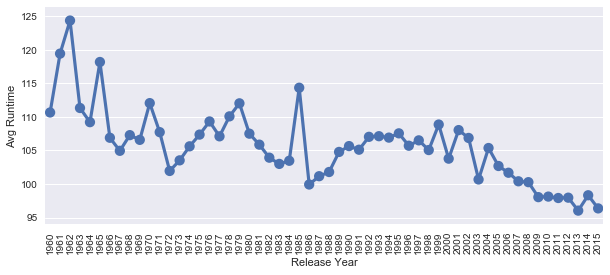

In [134]:
fig, ax1 = plt.subplots(figsize=(10,4))
ax =sns.pointplot(data=runtime_df, x="release_year", y="runtime")
ax.set(xlabel='Release Year', ylabel='Avg Runtime')
#plt.subplots(figsize=(10,4)
plt.xticks(rotation=90)
plt.show()

It looks like the average runtime has actually decreased overtime

### Q4. Describe movie release trends

In [135]:
tmdb['rlsm'] = tmdb['release_date'].dt.strftime('%B')
tmdb['rlsm'].value_counts()

September    1331
October      1153
December      985
January       919
August        918
June          827
March         822
November      814
May           809
July          799
April         797
February      691
Name: rlsm, dtype: int64

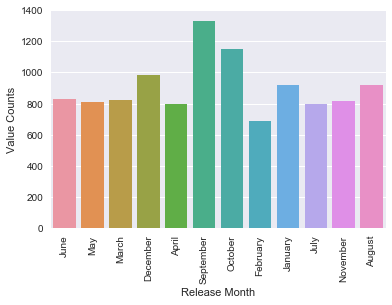

In [136]:
ax2 =sns.countplot(data=tmdb, x="rlsm")
ax2.set(xlabel='Release Month', ylabel='Value Counts')
plt.xticks(rotation=90)
plt.show()

Historically, most popular release months tend to be in the fall, September and October.

#### Number of film releases by year

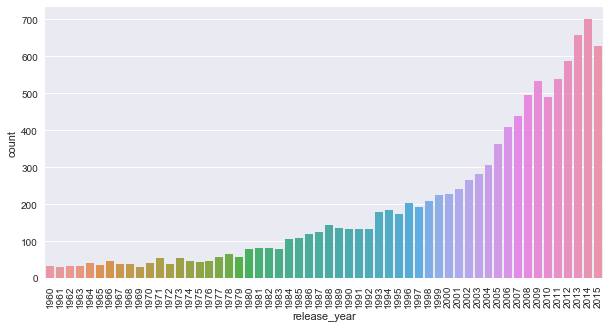

In [139]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="release_year",data=tmdb)
plt.xticks(rotation=90)
#plt.subplots(figsize=(10,4)
plt.show()

In [138]:
tmdb_new.groupby(['genres2'])['id'].nunique()
#df3.info()

genres2
Action             2384
Adventure          1471
Animation           699
Comedy             3793
Crime              1354
Documentary         520
Drama              4760
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1229
TV Movie            167
Thriller           2907
War                 270
Western             165
Name: id, dtype: int64

<a id='conclusions'></a>
## Conclusions

The most popular genres in this dataset are Adventure, Sci-Fi, and Fantasy. Adventure, fantasy and animation genres generate the highest revenue. Movies with high popularity scores also have very high vote counts. Popuolar movies also tend to have higher budgets and generate more revenue.

We can see that the average runtime for movies has actually decreased overtime and the most popular movie release month is September. By looking at the countplot for movies released by year, we can see that a good portion of the movies in tmdb were released in the last 20 years.

I removed some duplicate data and did end up dropping some data that had null values for genres. Since it was possible for a film to have multiple genres associated with it, I had to transform the data before doing any kind of analysis.
> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!